In [43]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np

In [44]:
iris = load_iris()
X = iris.data
y = iris.target

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5)
knn = KNeighborsClassifier(n_neighbors=5,weights=lambda x:np.exp(-x**2))
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.947368421053


In [77]:
from sklearn.cross_validation import KFold
kf = KFold(25,n_folds=5,shuffle=False)

In [85]:
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5,weights=lambda x:np.exp(-100*x**2))
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]


In [86]:
print(scores.mean())

0.96


In [87]:
k_range=range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96000000000000019, 0.95333333333333348, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96000000000000019, 0.96666666666666679, 0.96000000000000019, 0.96666666666666679, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


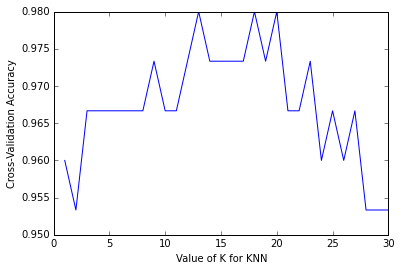

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')

In [89]:
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean())

0.98


In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean())

0.953333333333


In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [24]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [25]:
feature_cols = ['TV','Radio','Newspaper']
X = data[feature_cols]
y = data.Sales

In [27]:
lm = LinearRegression()
scores = cross_val_score(lm,X,y,cv=10,scoring='mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [28]:
mse_errors = -scores
print(mse_errors)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [29]:
rmse_errors = np.sqrt(mse_errors)

In [30]:
print(rmse_errors.mean())

1.69135317081


In [32]:
feature_cols = ['TV','Radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm,X,y,cv=10,scoring='mean_squared_error')).mean())

1.67967484191
